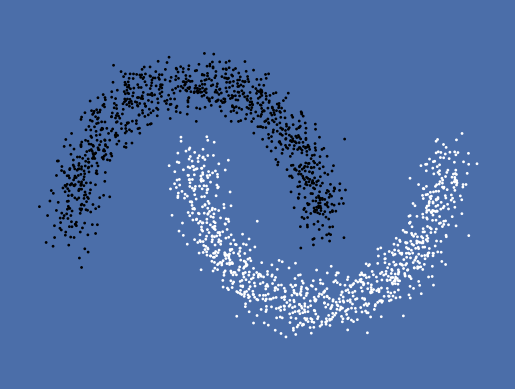

In [6]:
# all of these libraries are used for plotting
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from MLP_esp import MyReLU, MySigmoid, MyLinear, Sequential, MyReLU_horder, MySigmoid_horder, MyLinear_1st_order, MyLinear_2nd_order, MyLinear_deterministic, MLP_horder, plot_data, train_and_plot_horder, train_and_plot, train_and_plot_comparisons, plot_decision_boundary_comparison

# Plot the dataset

from sklearn.datasets import make_moons
X, Y = make_moons(n_samples=2000, noise=0.1)


%matplotlib inline
x_min, x_max = -1.5, 2.5
y_min, y_max = -1, 1.5
fig, ax = plt.subplots(1, 1, facecolor='#4B6EA9')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plot_data(ax, X, Y)
plt.show()

In [2]:
h=50

# define your network with your Sequential
# it should be a linear layer with 2 inputs and h outputs, followed by a ReLU
# then a linear layer with h inputs and 1 outputs, followed by a sigmoid

net = Sequential([MyLinear(2, h), MyReLU(), MyLinear(h, 1), MySigmoid()])

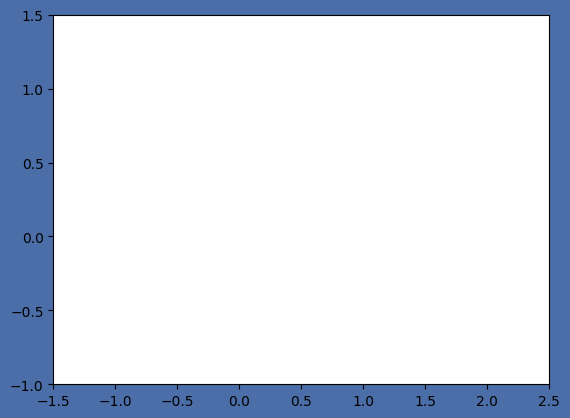

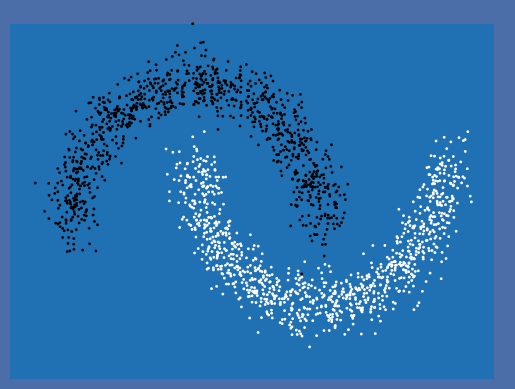

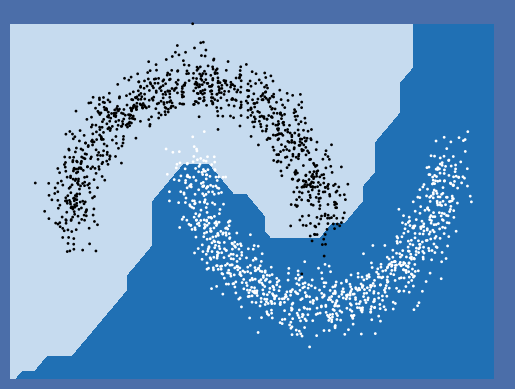

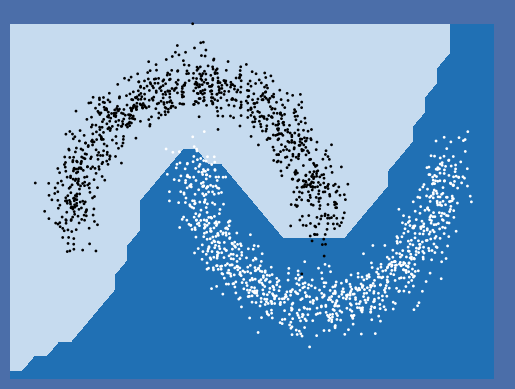

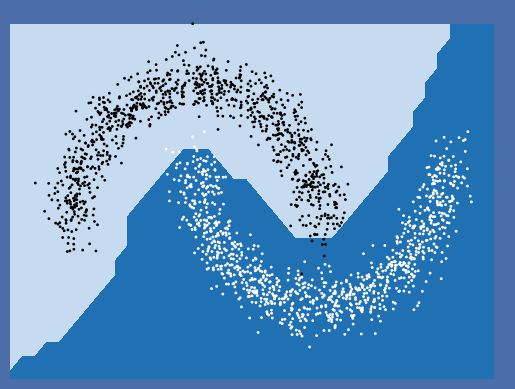

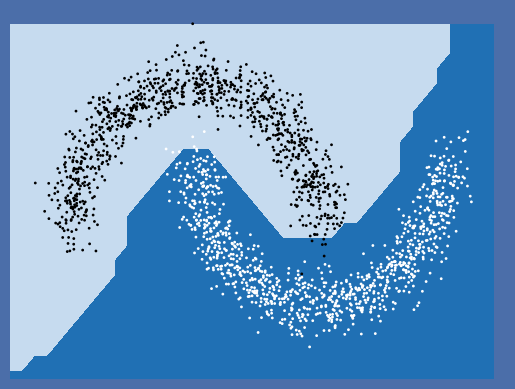

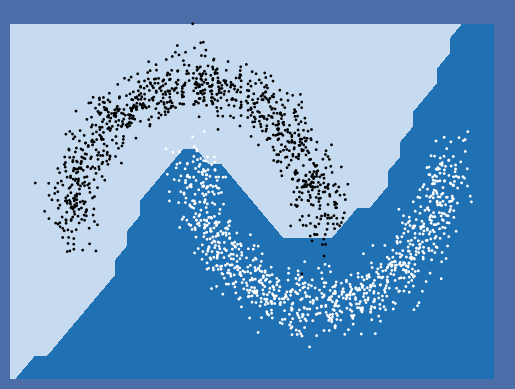

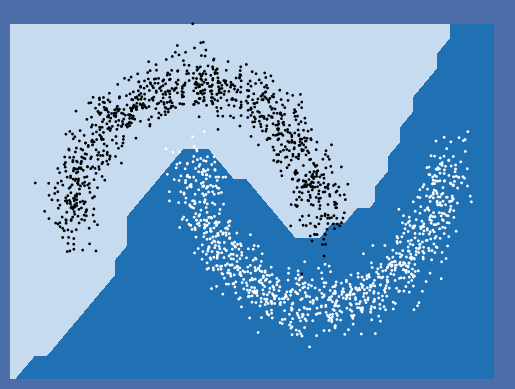

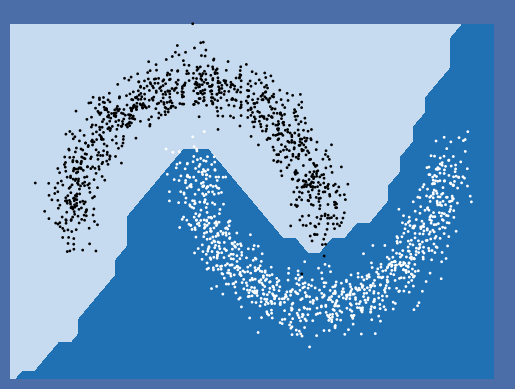

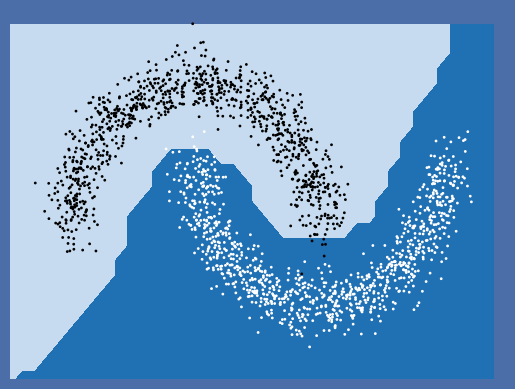

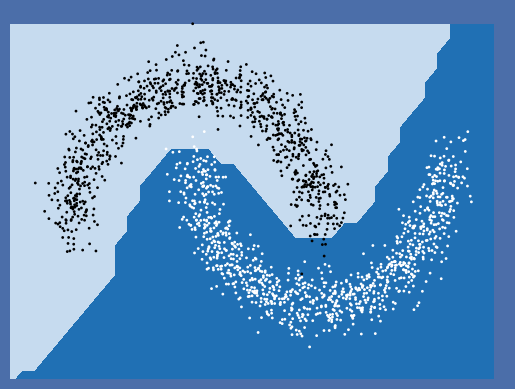

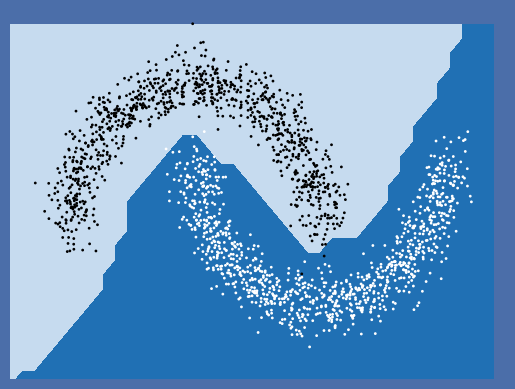

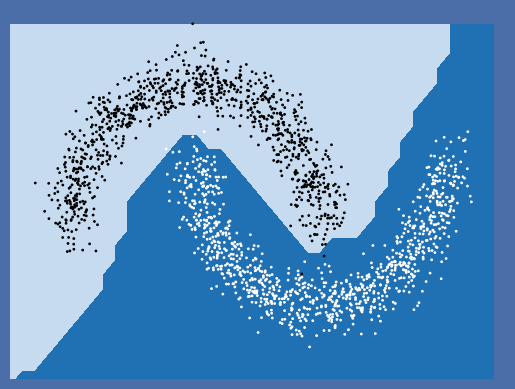

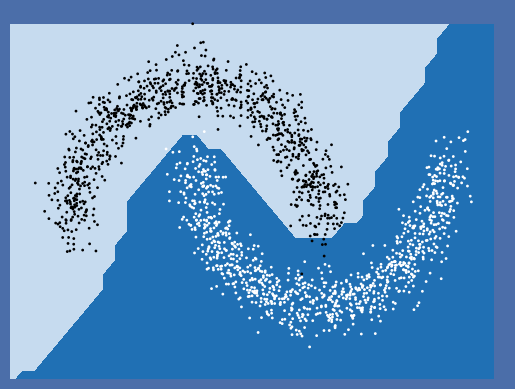

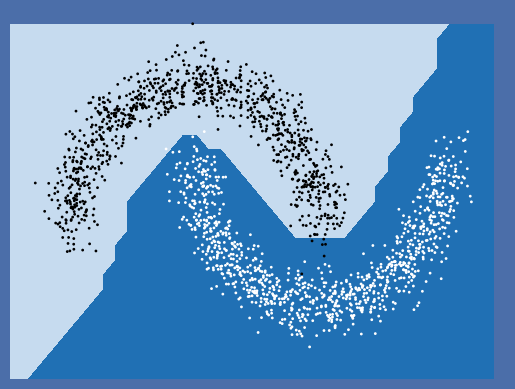

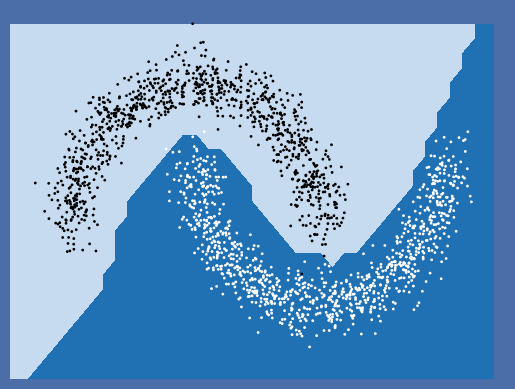

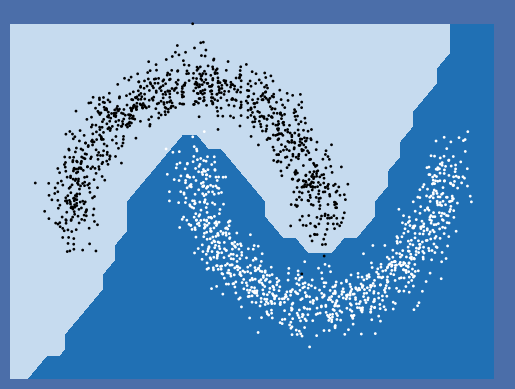

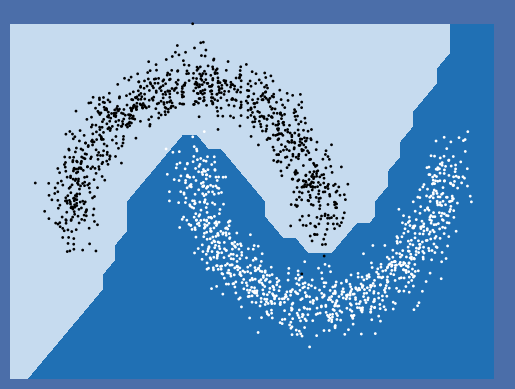

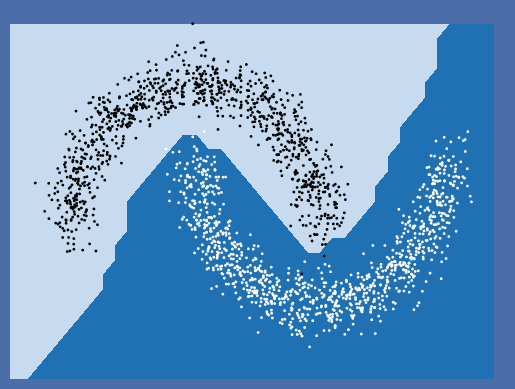

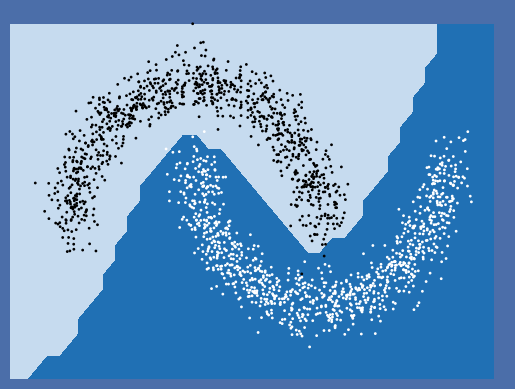

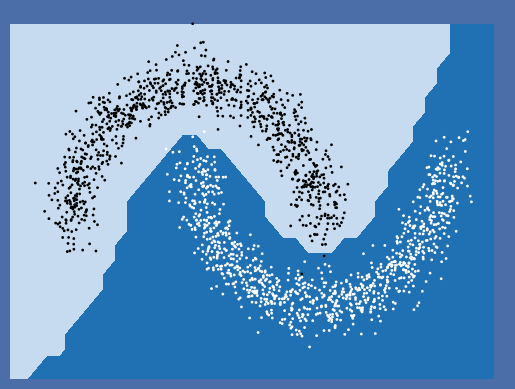

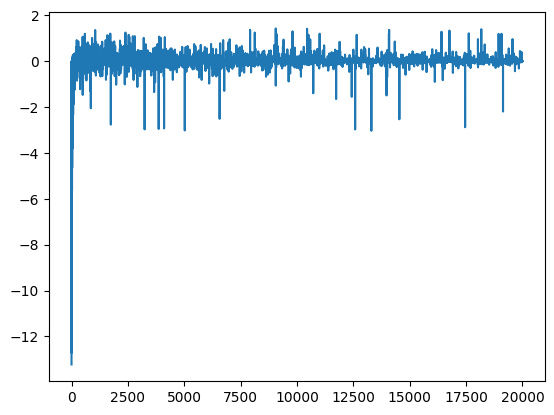

In [3]:
# run this cell to train the network with the bayesian learning rule and and display the evolution of the classification boundary
# the approach here does not train the standard deviation of the posterior

losses = train_and_plot(net, X, Y, n_iter=20000, learning_rate=1e-2)
plt.plot(losses)


/Users/alexandrefrancois/Documents/MVA/Deuxième semestre/Bayesian ML/bayesian_learning_rule/MLP_esp.py:223: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z1_mean, levels=[0.5], colors='red', linestyles='solid', label='Mean BLR')
/Users/alexandrefrancois/Documents/MVA/Deuxième semestre/Bayesian ML/bayesian_learning_rule/MLP_esp.py:224: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z2, levels=[0.5], colors='blue', linestyles='solid', label='SGD')


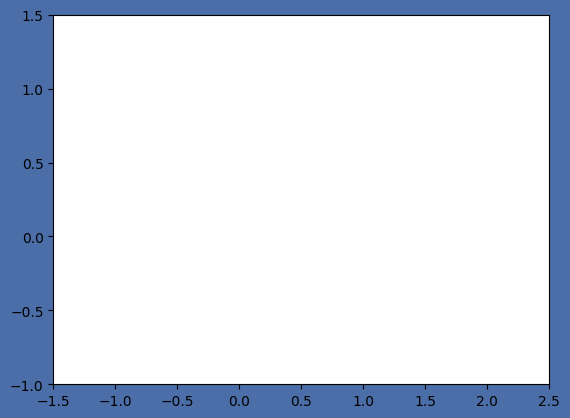

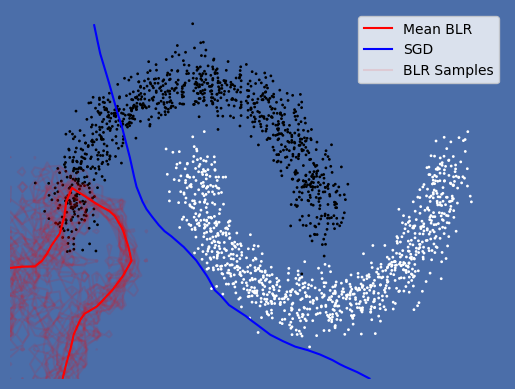

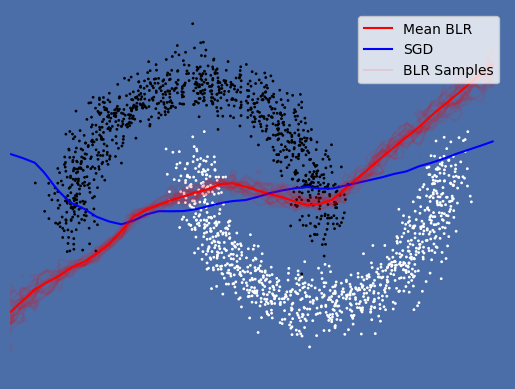

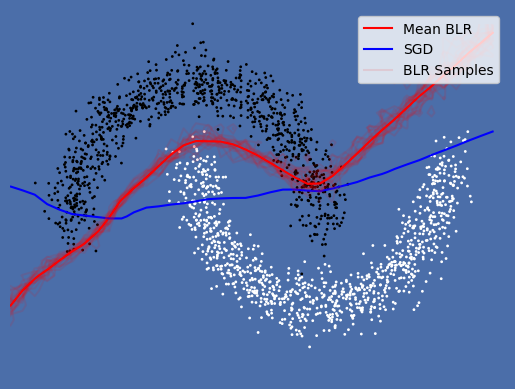

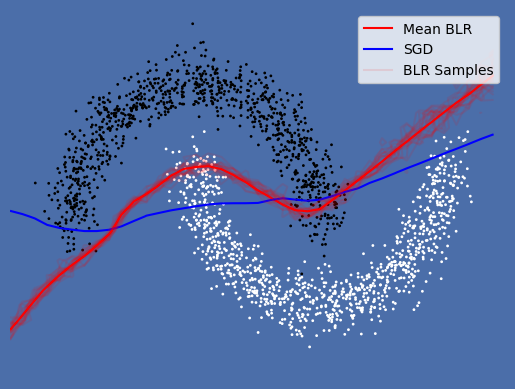

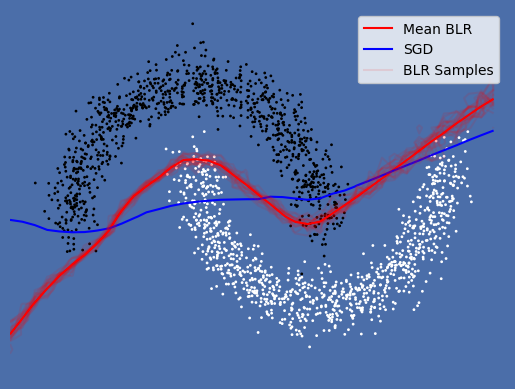

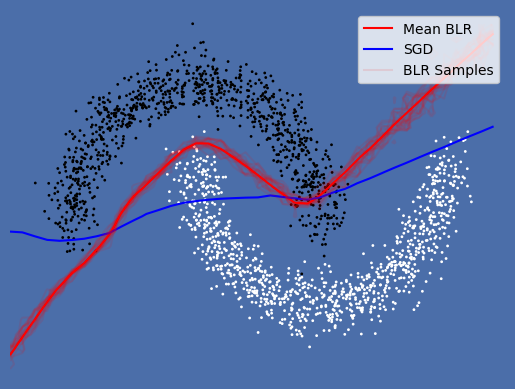

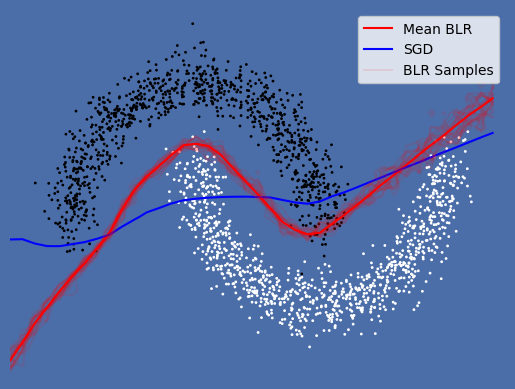

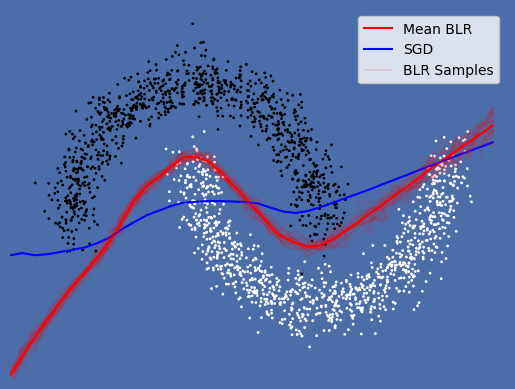

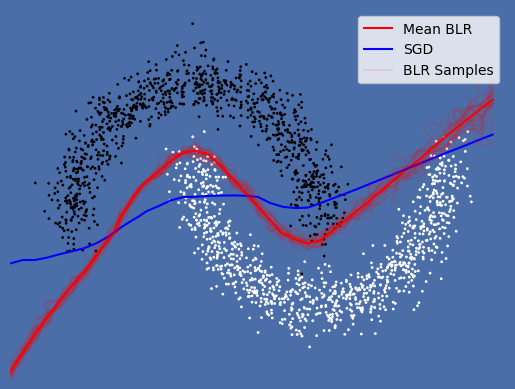

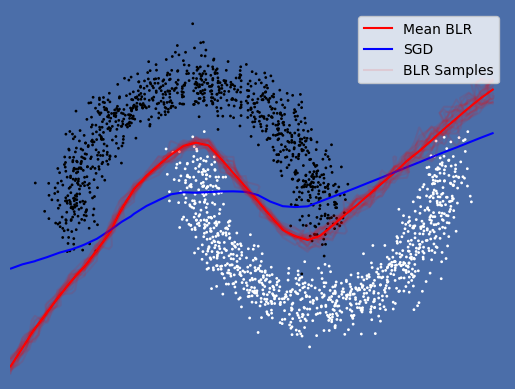

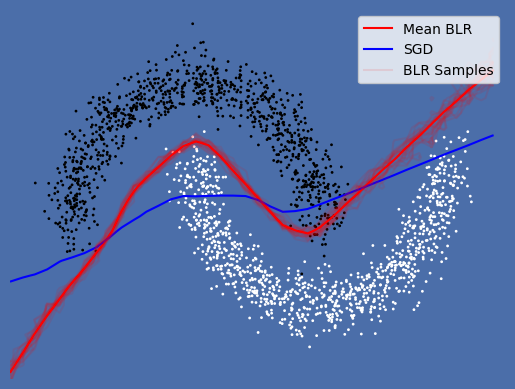

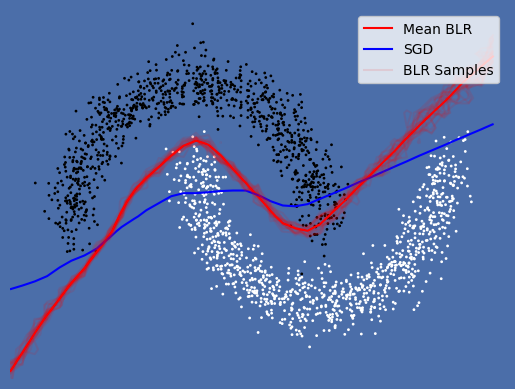

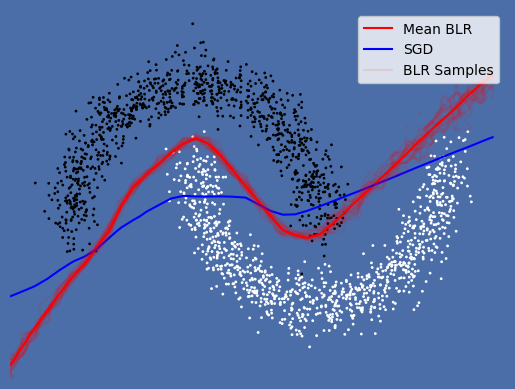

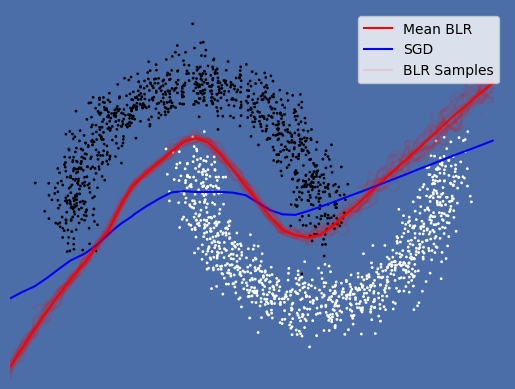

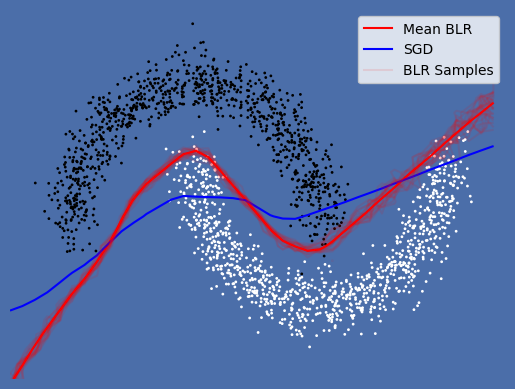

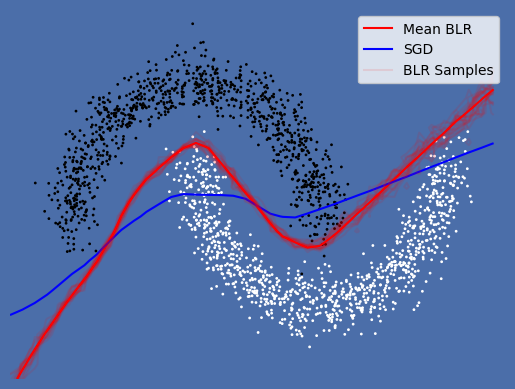

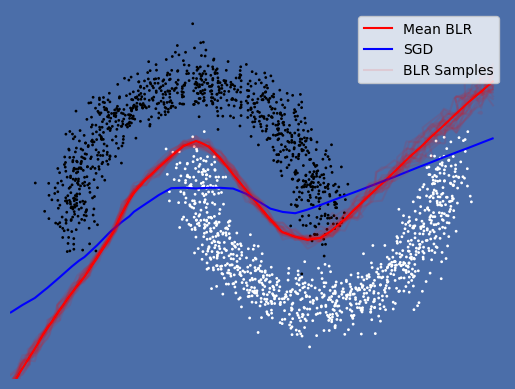

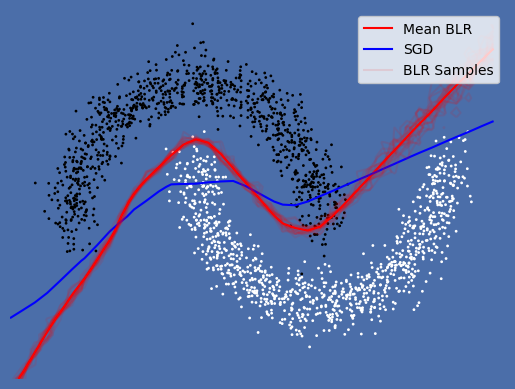

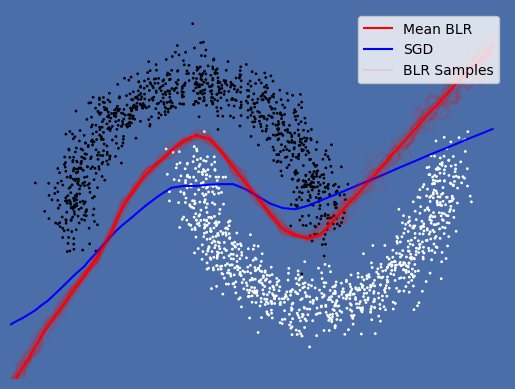

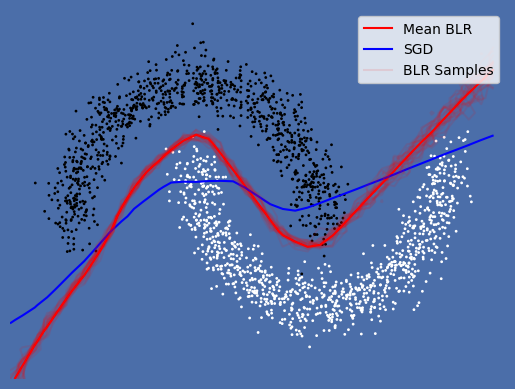

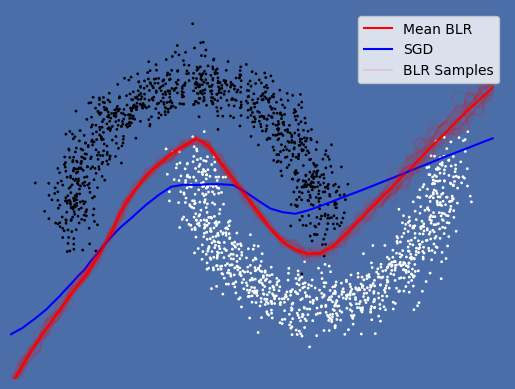

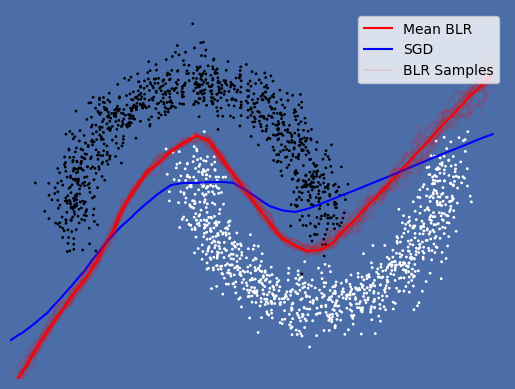

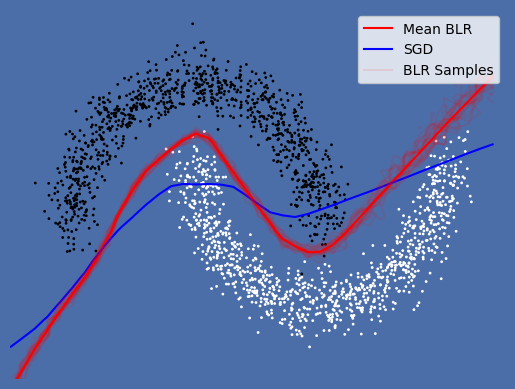

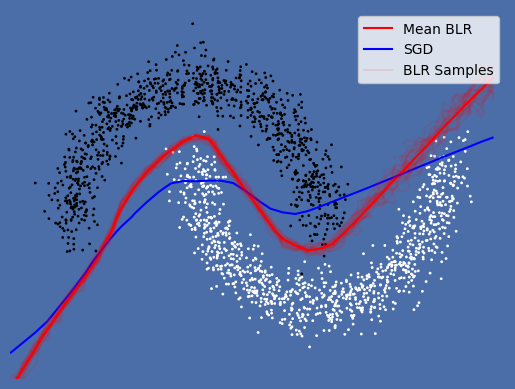

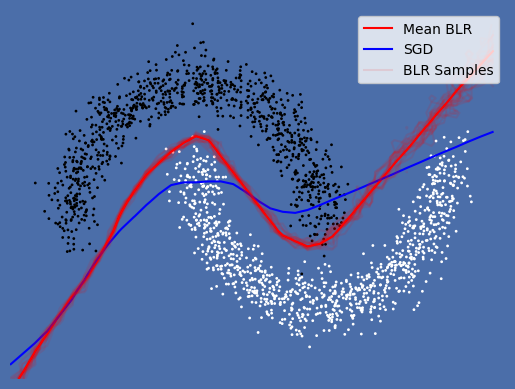

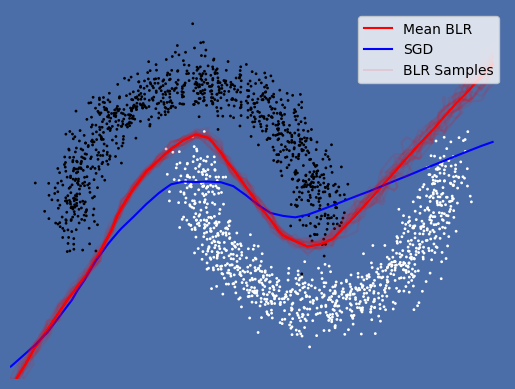

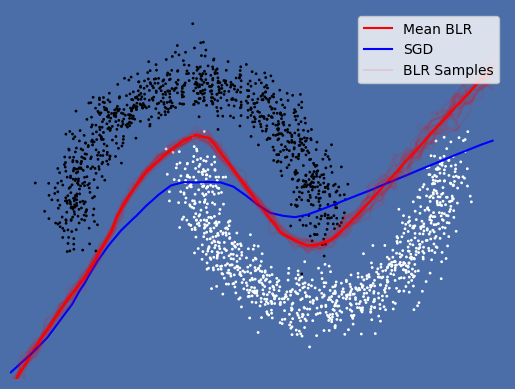

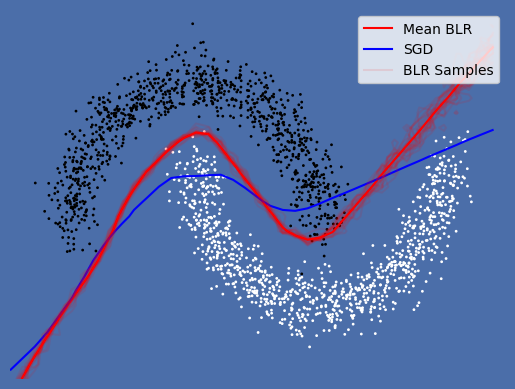

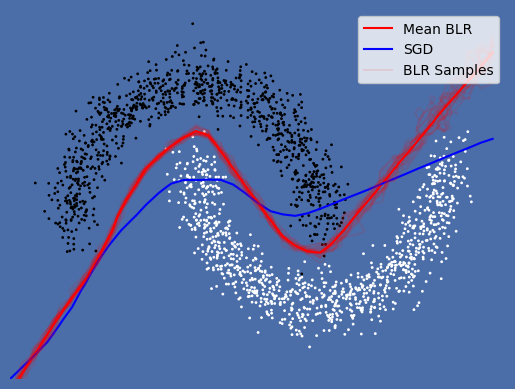

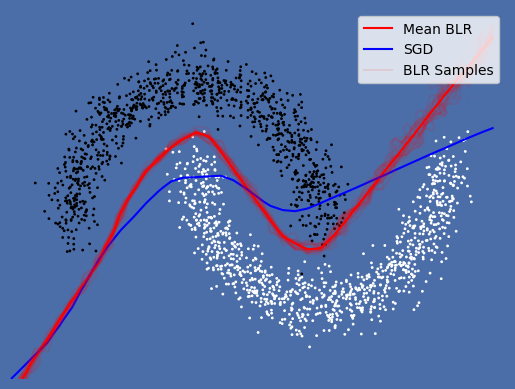

([-5.4654322966989115,
  -0.8983532303194647,
  1.9061348807809143e-05,
  -1.5214286292124233,
  0.0017003101020832965,
  0.0002702956408291506,
  0.2951625343685199,
  0.18532173277817698,
  -1.0328029477837002,
  0.013672772513992766,
  -0.24621827967544888,
  0.04776022839718052,
  -0.27178959588551116,
  -3.703684053654965,
  -3.413873240767889,
  0.7170429877767894,
  0.31623666008880064,
  0.6109240572634781,
  0.004206274144312319,
  -0.16199122108900463,
  -3.6555371766281426,
  -2.013310726307799,
  -0.9936803222529839,
  1.3349809149293665,
  -0.7385772906141758,
  0.29826494068564435,
  -1.1538157399219084,
  0.001292979949890769,
  -0.3878868349086367,
  -0.06275082006747258,
  0.013503869949218232,
  0.11735896682604222,
  -0.05836918779072786,
  1.3021724839282842,
  -0.5778839402454032,
  -0.08417550093345186,
  -0.41038940198931284,
  0.9726092065166853,
  -0.4081403403601761,
  0.0012620232132823108,
  -0.4391419697362647,
  -0.24368853854885494,
  -0.10086284111340797

In [4]:
# Run this to display the decision boundaries and the comparison between bayesian and non-bayesian approaches
# the bayesian approach trains both the mean and the standard deviation of the posterior
# the plots display the comparison between GD optimisation and the bayesian approach.
# For the bayesian approach, we sample 20 sets of weights from the posterior and plot the decision boundary for each of them. The 
# bold line is the mean of the sampled weights.  

h = 50

net1 = Sequential([MyLinear(2, h), MyReLU(), MyLinear(h, 1), MySigmoid()])
net2 = Sequential([MyLinear_deterministic(2, h), MyReLU(), MyLinear_deterministic(h, 1), MySigmoid()])

train_and_plot_comparisons(net1, net2, X, Y, n_iter=30000, learning_rate=1e-2, save=False)